# **Demented vs. Nondemented Classification**
---



**Project Overview**

This project involves developing a Machine Learning model to classify patients as demented or non-demented. It is conducted independently using data from the [MRI and Alzheimer's Kaggle Dataset](https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers?select=oasis_longitudinal.csv).

  **Objectives** :  The primary goal for this project is to understand each step in the machine learning development processes, creating a structured guide for developing and deploying the demented vs non-demented classification model. Key steps covered in this project are as follows:
  - `Data Collection`: Gathering and organizing relevant data for model development and training
  - `Data Preprocessing`: Cleaning and preparation stage before proceeding to the analysis stage.
  - `Exploratory Data Analysis (EDA)`: Analyzing the prepared data through visualization and identifying correlations or patterns within variables.
  - `Feature Engineering`: Feature selection to improve efficiency and model accuracy.
  - `Model Selection`: Testing and choosing the most suitable model for classification.
  - `Hyperparameter Tuning`: Optimizing model parameters to enhance model performance using various techniques.
  - `Model Training`: Training the selected model to learn patterns.
  - `Model Evaluation`: Evaluating and giving assesment on model accuracy and effectiveness using several evaluation metrics.
  - `Model Deployment`: Deploying the model to make prediction in a production setting.

##**A. Data Collection**


To begin, we must first import the necessary libraries. Each library modules will be deployed throughout the model development according to their function and use, as follows:

`Numpy`, `Pandas`, `Pickle`, `Matplotlib`, `Seaborn`, `Random`, `Scikit-learn`

In [1]:
#import libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Now that we have declared each of the important libraries, we can finally start loading the dataset. Here, we will transform the dataset file we have from a .csv file into a readable format using **pd.read_csv**:

In [2]:
pdDS = pd.read_csv('/content/DementedvsNonDemented.csv')

But wait! Before we proceed, there is one more step that we can take. Creating a copy of the table data will prove useful in the long way. We can experiment with the dataframe without affecting the original data.

In [3]:
DS = pdDS.copy()

Once done, now we can take a look at the dataframe we have and gain initial insight on the data types of our variables.

In [4]:
DS.head(3)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046


In [5]:
DS.tail(3)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323
372,OAS2_0186,OAS2_0186_MR3,Nondemented,3,1608,F,R,65,13,2.0,30.0,0.0,1333,0.801,1.317


Dataset Variable details:

<center>

|**Column Name**|**Description**|**Data Type**|
|:---|:---|:---|
|**Subject ID**|**Subject Identification (i.e. OAS2_0001)**|**Categorical Nominal**|
|**MRI ID**|**MRI Exam Identification (i.e. OAS2_0001_MR1)**|**Categorical Nominal**|
|**Group**|**Class (i.e. Demented, Nondemented)**|**Categorical Nominal**|
|**Visit**|**Number of visits (i.e. 1-5)**|**Ordinal Categorical**|
|**MR Delay**|**Number of days of delay between visits (i.e. 0-2639)**|**Numerical Discrete**|
|**M/F**|**Gender (i.e. M, F)**|**Categorical Nominal**|
|**Hand**|**Right or Left-Handed (i.e. R)**|**Categorical Nominal**|
|**Age**|**Age at time of image acquisition (years). (i.e. 60-98)**|**Numerical Discrete**|
|**EDUC**|**Years of education (i.e. 6-23)**|**Numerical Discrete**|
|**SES**|**Socioeconomic status as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status) (i.e. 1-5)**|**Numerical Discrete**|
|**MMSE**|**Mini-Mental State Examination (i.e. 4-30)**|**Numerical Discrete**|
|**CDR**|**Clinical Dementia Rating (i.e. 0-2)**|**Numerical Continuous**|
|**eTIV**|**Estimated total intracranial volume (cm^3) (i.e. 1106-2004)**|**Numerical Discrete**|
|**nWBV**|**Normalized whole brain volume: expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process (i.e. 0.64-0.84)**|**Numerical Continuous**|
|**ASF**|**Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e. the determinant of the transform matrix) (i.e. 0.88-1.59)**|**Numerical Continuous**|

In [6]:
DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [7]:
DS.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [8]:
#Check which variable contain missing value ('NaN')
for i, var in enumerate(DS):
  if any(DS.iloc[:,i].isnull()):
    print(var, DS.iloc[:,i].isnull().sum())

SES 19
MMSE 2


In [9]:
DS.nunique()

,0
Subject ID,150
MRI ID,373
Group,3
Visit,5
MR Delay,201
M/F,2
Hand,1
Age,39
EDUC,12
SES,5


From here we can see that ....

Furthermore, duplicate....

In [10]:
DS.duplicated().sum()

0

##**B. Data Preprocessing**

Based on the previous section, we now know that our dataset contain several missing values. To identify the category of missing values, we can filtered the dataframe to display only the data's with NaN values:

In [11]:
DS[DS.isnull().any(axis=1)]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,NaN,27.0,1.0,1365,0.727,1.286
12,OAS2_0007,OAS2_0007_MR4,Demented,4,1281,M,R,75,16,NaN,27.0,1.0,1372,0.710,1.279
134,OAS2_0063,OAS2_0063_MR1,Demented,1,0,F,R,80,12,NaN,30.0,0.5,1430,0.737,1.228
135,OAS2_0063,OAS2_0063_MR2,Demented,2,490,F,R,81,12,NaN,27.0,0.5,1453,0.721,1.208
207,OAS2_0099,OAS2_0099_MR1,Demented,1,0,F,R,80,12,NaN,27.0,0.5,1475,0.762,1.190
208,OAS2_0099,OAS2_0099_MR2,Demented,2,807,F,R,83,12,NaN,23.0,0.5,1484,0.750,1.183


The filtered dataframe provided the necessary insights efficiently. Out of the 15 columns, only two--SES and MMSE--contain  missing values. The SES column has a total of 19 missing entries, while MMSE has 2, representing approximately 5.1% and 0.5% of the total data, respectively. Further inspection revealed that many missing values originate from the same subject IDs, indicating that fewer subjects are responsible for the missing values than initialy appeared.

Closer examination on the variable details uncovered key insight that defined the category of the missing values. The column SES pertains to the subject's economic condition, while the MMSE column reflects the subject's mental condition. Both variables are likely to be left blank for particular reasons such as the subject's reluctance to disclose this information.

These insights combined indicate that the missing values falls under the category of MNAR (Missing Not At Random). Normally, missing values in this category require complex approaches to produce optimal inferences. However, to streamline the overall model development, methods such as multiple imputation (MI) can be applied using the following procedure to address these missing values.

To impute the missing data, here we will employe the `IterativeImputer` function derived from `Scikit-learn`. This particular imputation method was chosen due to the inherent property of the missing data--Missing Not At Random (MNAR), as discussed previously. This imputation method will ensure sufficient interference computation to produce

In [12]:
#Impute missing data with IterativeImputer from sklearn
DSimputer = IterativeImputer()
imputedDS = DSimputer.fit_transform(DS[['SES','MMSE']])

imputedDS = pd.DataFrame(imputedDS, columns=DS[['SES','MMSE']].columns)

#Convert continuous data on SES and MMSE into discrete data
imputedDS['SES'] = round(imputedDS['SES'])
imputedDS['MMSE'] = round(imputedDS['MMSE'])

imputedDS.head(5)

,SES,MMSE
0,2.0,27.0
1,2.0,30.0
2,3.0,23.0
3,2.0,28.0
4,3.0,22.0


In [13]:
DS['SES'] = imputedDS['SES']
DS['MMSE'] = imputedDS['MMSE']
DS.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,3.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,3.0,22.0,0.5,1698,0.701,1.034


In [14]:
DS['Group'].unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [15]:
DS.loc[DS['Group']=='Converted','Group'] = 'Demented'

In [16]:
DS['Group'].unique()

array(['Nondemented', 'Demented'], dtype=object)

#**C. Exploratory Data Analysis (EDA)**

In [17]:
print(len(DS.columns))
DS.columns

15


Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

### I. Histplot

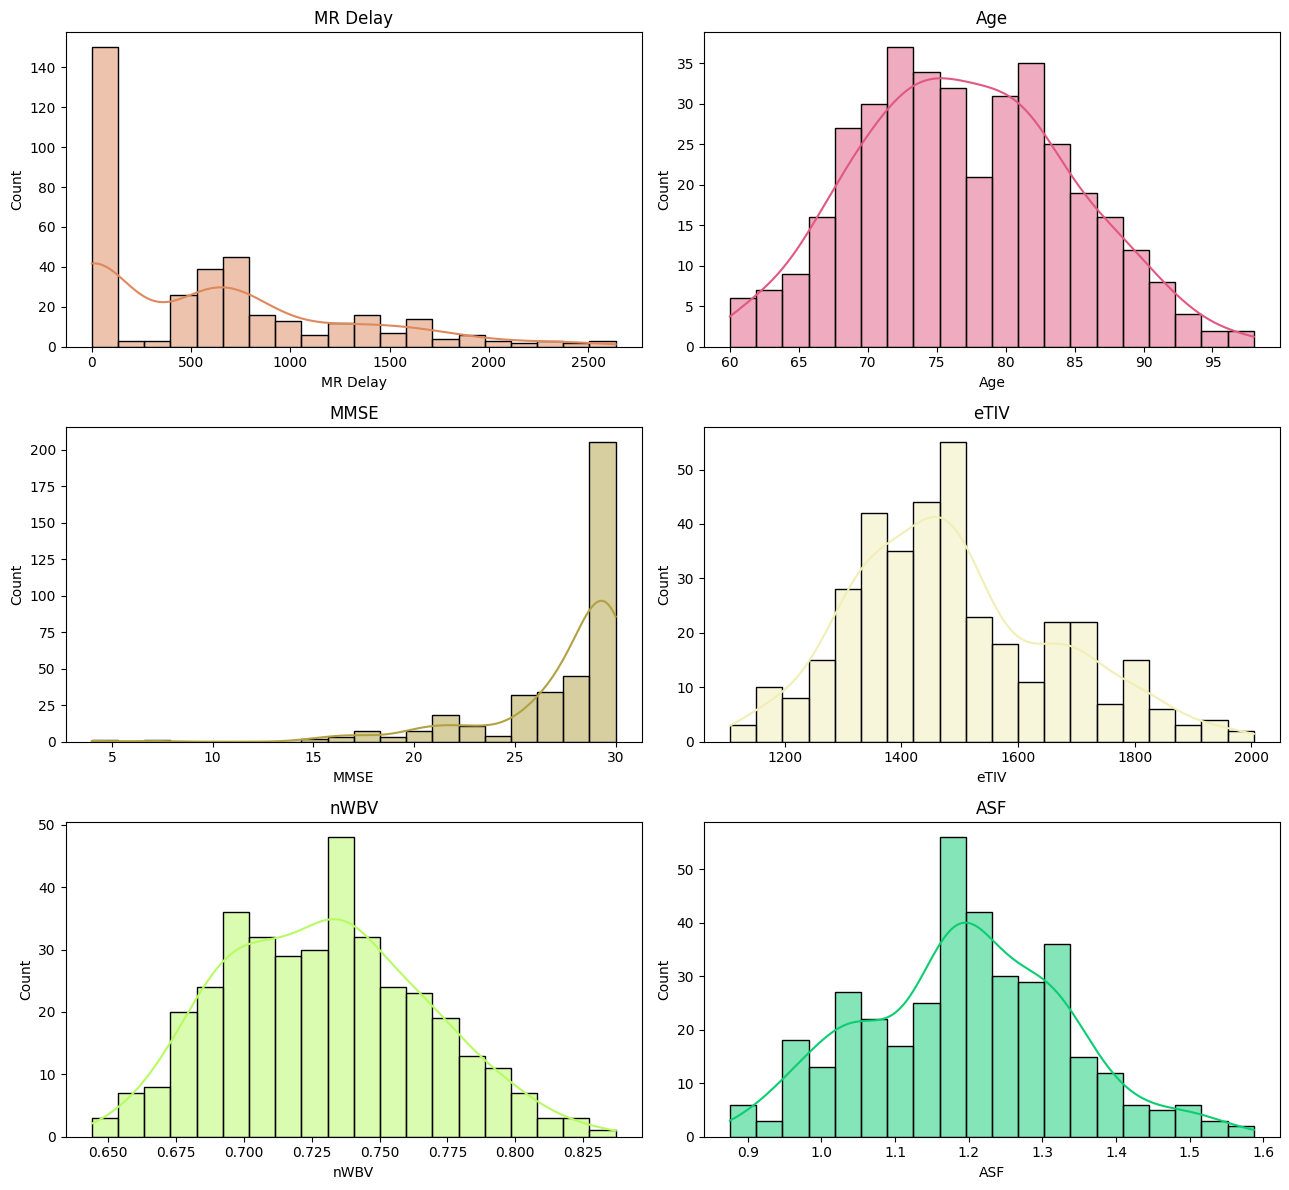

In [23]:
fig, axes = plt.subplots(3,2, figsize=(13,12))
col_hist = ['MR Delay', 'Age', 'MMSE', 'eTIV', 'nWBV', 'ASF']
axes = axes.flatten()

def random_color():
    return [random.random() for _ in range(3)]

for i, var in enumerate(col_hist):
  ax = axes[i]
  sns.histplot(data=DS, x=var, ax=ax, kde=True,color=random_color(), edgecolor='black', bins=20)
  ax.set_title(f'{var}')

for j in range(len(col_hist), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

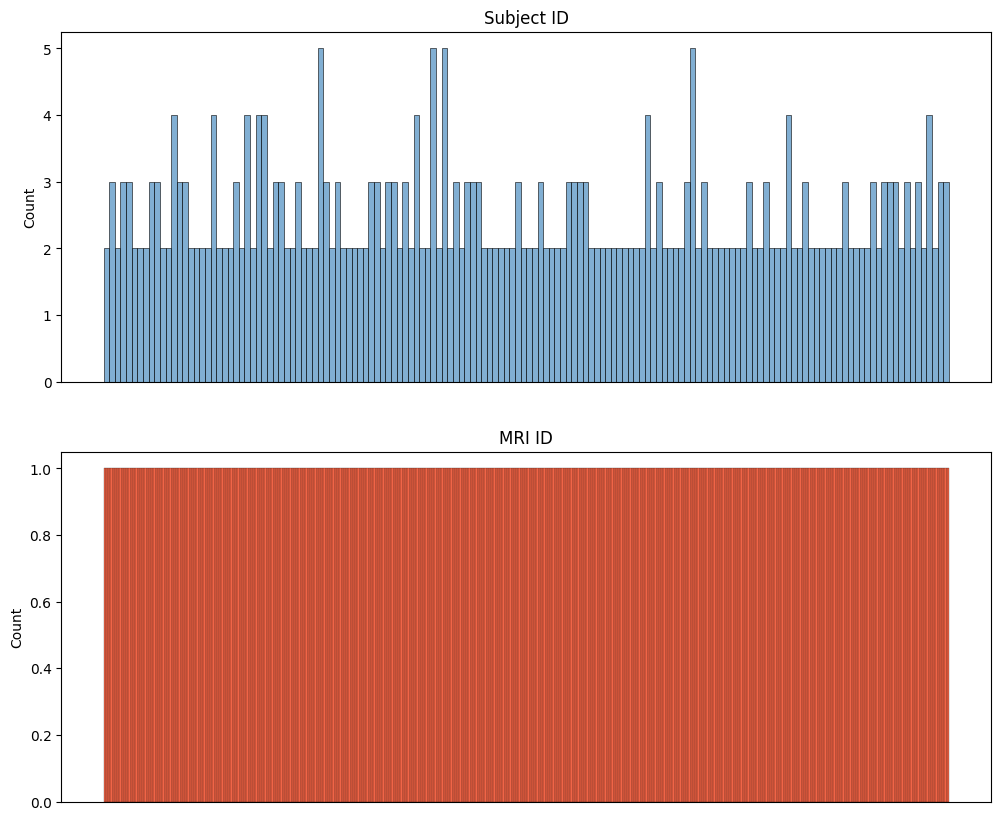

In [24]:
fig, axes = plt.subplots(2,1, figsize=(12,10))
col_name = ['Subject ID','MRI ID']
axes = axes.flatten()

for i, var in enumerate(col_name):
  ax = axes[i]
  sns.histplot(DS.iloc[:,i], label=var,ax=ax, color=random_color(), edgecolor='black', bins=20)
  ax.xaxis.set_visible(False)
  ax.set_title(f'{var}')

<Axes: xlabel='MR Delay', ylabel='Count'>

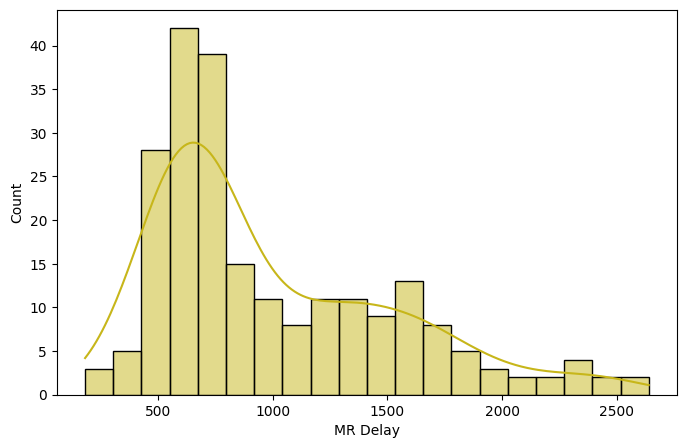

In [25]:
mrd = DS[DS['MR Delay']>0]

plt.figure(figsize=(8,5))
sns.histplot(mrd['MR Delay'], label='MR Delay', kde=True,color=random_color(), edgecolor='black', bins=20)

### Countplot

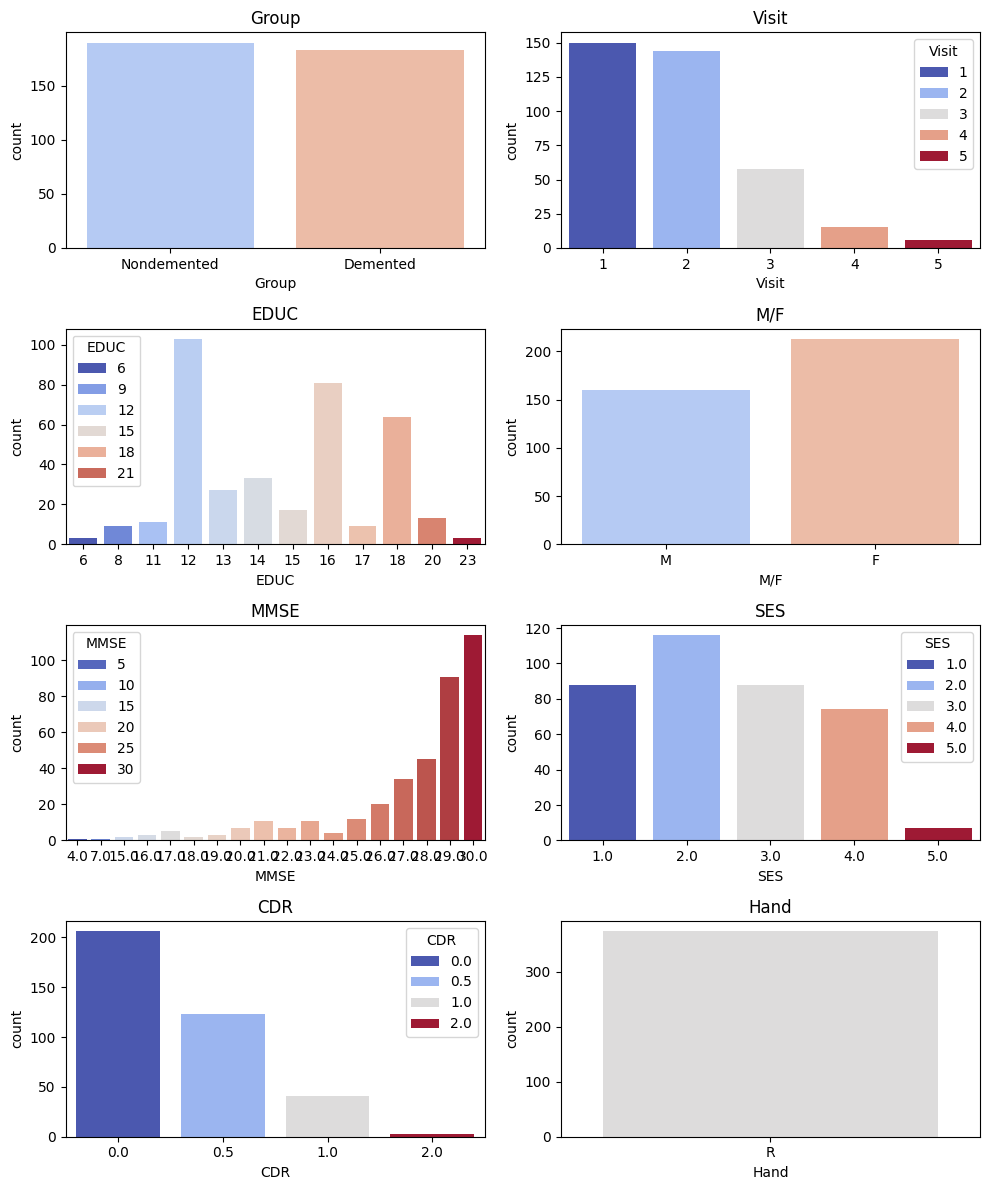

In [35]:
fig, axes = plt.subplots(4,2, figsize=(10,12))
col_bar = ['Group', 'Visit', 'EDUC','M/F', 'MMSE', 'SES', 'CDR', 'Hand']
axes = axes.flatten()

for i, var in enumerate(col_bar):
  ax = axes[i]
  sns.countplot(x = var, data=DS, ax=ax,hue=var, palette='coolwarm')
  ax.set_title(f'{var}')

for j in range(len(col_bar), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Corelation plot

In [36]:
Coded_DS = DS.copy()
DS_to_convert = ['Subject ID', 'MRI ID', 'Group', 'M/F', 'Hand']

for col in DS_to_convert:
  Coded_DS[col] = Coded_DS[col].astype('category').cat.codes

In the context of statistical analysis or model training (which we will explore later), certain datatypes cannot be transformed directly by methods like `IterativeImputer`. As indicated by the previous `.info()` output of our dataframe, several variables in our dataset are categorized as `object`. To resolve this issue, the code above effectively transforms the string values in each `object` column into representative nominal codes using the `cat.codes` function. This conversion facilitates proper handling of categorical data during the imputation process.

The variables was succesfully transformed into nominal datatypes as shown below.

In [37]:
Coded_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    int16  
 1   MRI ID      373 non-null    int16  
 2   Group       373 non-null    int8   
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    int8   
 6   Hand        373 non-null    int8   
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         373 non-null    float64
 10  MMSE        373 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int16(2), int64(5), int8(3)
memory usage: 31.8 KB


<Axes: >

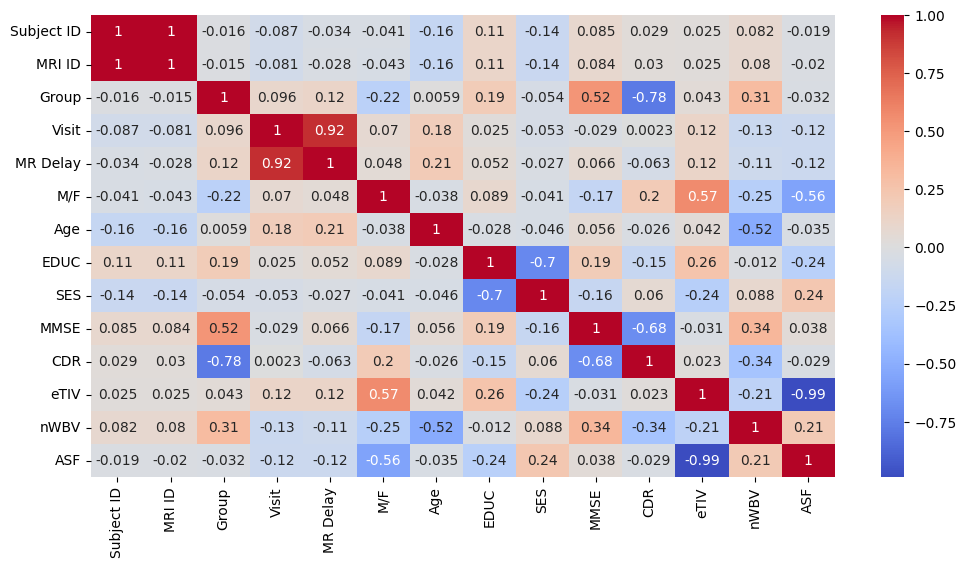

In [45]:
plt.figure(figsize=(12,6))
corr = Coded_DS.drop(columns=['Hand']).corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [46]:
corr = Coded_DS.corr()
row = corr.index
corr_arr = []
for i,var in enumerate(corr):
  for j,val in enumerate(corr[var]):
    if 0.4<abs(val)<0.99:
      corr_arr.append([var,row[j],round(val,2)])

corr_pd = pd.DataFrame(corr_arr,columns=['First Variable','Second Variable','Value'])

In [47]:
corr_pd

,First Variable,Second Variable,Value
0,Group,MMSE,0.52
1,Group,CDR,-0.78
2,Visit,MR Delay,0.92
3,MR Delay,Visit,0.92
4,M/F,eTIV,0.57
5,M/F,ASF,-0.56
6,Age,nWBV,-0.52
7,EDUC,SES,-0.70
8,SES,EDUC,-0.70
9,MMSE,Group,0.52


In [48]:
drop_duplicate = []
for i in range(len(corr_pd)):
  for j in range(i+1,len(corr_pd)):
    if (corr_pd.iloc[i,0] == corr_pd.iloc[j,1]) and (corr_pd.iloc[i,1] == corr_pd.iloc[j,0]):
      drop_duplicate.append(j)

In [57]:
corr_pd = corr_pd.drop(drop_duplicate).reset_index(drop=True)

In [58]:
corr_pd

,First Variable,Second Variable,Value
0,Group,MMSE,0.52
1,Group,CDR,-0.78
2,Visit,MR Delay,0.92
3,M/F,eTIV,0.57
4,M/F,ASF,-0.56
5,Age,nWBV,-0.52
6,EDUC,SES,-0.70
7,MMSE,CDR,-0.68
8,eTIV,ASF,-0.99


Based on the correlatio result above, we can assume that both `MMSE` and `CDR` has the most influence on `Group`. Other variables, on the other hand, doesn't display correlation as high as the two

which we will